In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [408]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

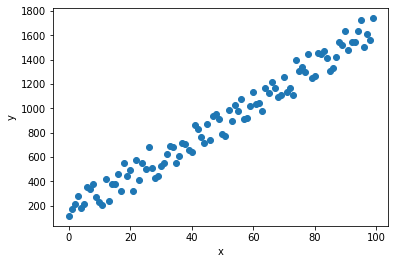

In [409]:
# Do not change the code in this cell
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [410]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

In [411]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        # Apply batch gradient descent
        grad0, grad1 = 0, 0
        for j in range(len(ip)):    
            grad0 = grad0 + (op[j] - (params[0] + params[1]*ip[j]))
            grad1 = grad1 + (op[j] - (params[0] + params[1]*ip[j])) * ip[j]
        
        params[0] = params[0] - alpha*(-2/len(ip))*grad0
        params[1] = params[1] - alpha*(-2/len(ip))*grad1
        
        iteration = iteration + 1
        #None
    
    return params, cost, params_store

In [412]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 13360866.288642395
--------------------------
iteration: 1
cost: 433766165.0251093
--------------------------
iteration: 2
cost: 14092969053.919186
--------------------------
iteration: 3
cost: 457888093314.1717
--------------------------
iteration: 4
cost: 14877039332361.938
--------------------------
iteration: 5
cost: 483363309431052.8
--------------------------
iteration: 6
cost: 1.5704743655075946e+16
--------------------------
iteration: 7
cost: 5.10255885096158e+17
--------------------------
iteration: 8
cost: 1.6578498445676806e+19
--------------------------
iteration: 9
cost: 5.386446658258901e+20
--------------------------
iteration: 10
cost: 1.7500865773422604e+22
--------------------------
iteration: 11
cost: 5.6861289501445787e+23
--------------------------
iteration: 12
cost: 1.8474550262977757e+25
--------------------------
iteration: 13
cost: 6.0024844742680896e+26
--------------------------
iteration: 14
cost: 1.95024070144

In [413]:
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """
    
    # initialize iteration, number of samples, cost and parameter array
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    # Compute the cost and store the params for the corresponding cost
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        # Apply stochastic gradient descent
        index = np.random.randint(0, len(ip), 1) #random sample
        x = np.take(ip, index)
        y = np.take(op, index)
        params[0] = params[0] - alpha * (-2/len(ip)) * (y - (params[0] + params[1] * x))
        params[1] = params[1] - alpha * (-2/len(ip)) * (y - (params[0] + params[1] * x)) * x
        
        i = i + 1;
        #None
            
    return params, cost, params_store

In [414]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 13069770.405666567
--------------------------
iteration: 1
cost: 9854245.798537338
--------------------------
iteration: 2
cost: 8513323.307329785
--------------------------
iteration: 3
cost: 8134985.11985709
--------------------------
iteration: 4
cost: 7848387.389165546
--------------------------
iteration: 5
cost: 7842829.749375889
--------------------------
iteration: 6
cost: 7352503.259097794
--------------------------
iteration: 7
cost: 4479214.726967116
--------------------------
iteration: 8
cost: 4459260.001009515
--------------------------
iteration: 9
cost: 4390781.47769938
--------------------------
iteration: 10
cost: 3085239.8874102193
--------------------------
iteration: 11
cost: 2475829.5553899296
--------------------------
iteration: 12
cost: 1752853.556724417
--------------------------
iteration: 13
cost: 1749219.0861028135
--------------------------
iteration: 14
cost: 1689641.1827314473
--------------------------
itera

In [415]:
# Calculate Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm

import math

#batch gradient descent

min_cost_index_batch = np.argmin(cost_batch)
params0_batch, params1_batch = params_store_batch[0][min_cost_index_batch], params_store_batch[1][min_cost_index_batch]

#print(params0_batch, params1_batch)

MSE_batch = 0
for j in range(len(x_test)):
    y_pred = params0_batch + params1_batch*x_test[j]
    MSE_batch = MSE_batch + (y_pred - y_test[j])**2
    
RMSE_batch = math.sqrt(MSE_batch/len(x_test))



#stochastic gradient descent

min_cost_index = np.argmin(cost)
params0, params1 = params_store[0][min_cost_index], params_store[1][min_cost_index]

#print(params0, params1)

MSE = 0
for j in range(len(x_test)):
    y_pred = params0 + params1*x_test[j]
    MSE = MSE + (y_pred - y_test[j])**2
    
RMSE = math.sqrt(MSE/len(x_test))


print('RMSE_batch', RMSE_batch)
print('RMSE_stochastic', RMSE)


RMSE_batch 3450.418362135709
RMSE_stochastic 89.14389898650074


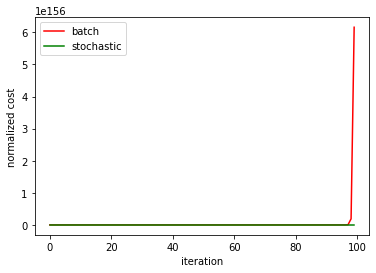

min cost with BGD: 13360866.288642395
min cost with SGD: 10134.734178332348


In [416]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')

In [417]:
# Which linear regression model do you think works best for this data? Explain in brief

'''
For this type of data and learning rate, Stochastic Gradient descent works well, by observing the above results u can see the Root minimum square
error value for stochastic gradient descent is far better than gradient descent.

If training data is too large, in each iteration if we want to train on that data it is time taking process so, instead we can use batch or stochastic 
gradient descent which only trains on a random training data based on batch size which is very fast when we want to train on large data.

Observations:

1. here the data size is not that much big, but we are using a high learning rate in gradient descent, rather if we use very less
   learning rate and increase the number of iterations u will get a very less error value compared to stochastic gradient descent.
2. so by this observations we can say learning rate is the one which helps us to get the minimum error value, in above gradient descent
   if u change the learning rate to very low (<=0.00001) the RMSE value will decrease a lot.
3. And if u want further minimize the RSME value we need to increase the number of iterations.
4. here stochastic gradient descent worked well even with high learning rate because we use only one training sample and it starts 
   improving itself right away from the first sample.
5. SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD, but in most cases 
   the close approximation that you get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.


** So deciding good learning rate is important in Gradient descent **

'''

'\nFor this type of data and learning rate, Stochastic Gradient descent works well, by observing the above results u can see the Root minimum square\nerror value for stochastic gradient descent is far better than gradient descent.\n\nIf training data is too large, in each iteration if we want to train on that data it is time taking process so, instead we can use batch or stochastic \ngradient descent which only trains on a random training data based on batch size which is very fast when we want to train on large data.\n\nObservations:\n\n1. here the data size is not that much big, but we are using a high learning rate in gradient descent, rather if we use very less\n   learning rate and increase the number of iterations u will get a very less error value compared to stochastic gradient descent.\n2. so by this observations we can say learning rate is the one which helps us to get the minimum error value, in above gradient descent\n   if u change the learning rate to very low (<=0.00001)